## 6.1 
**Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps**

In [71]:

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

data=pd.DataFrame()
# Large Cap
adaniports = pd.read_csv('ADANIPORTS.csv')
data['Adani Ports'] = adaniports['Close Price']
bpcl = pd.read_csv('BPCL.csv')
data['BPCL'] = bpcl['Close Price']
cipla = pd.read_csv('CIPLA.csv')
data['Cipla'] = cipla['Close Price']
drreddy = pd.read_csv('DRREDDY.csv')
data['DrReddy'] = drreddy['Close Price']
gail = pd.read_csv('GAIL.csv')
data['GAIL'] = gail['Close Price']
hindalco = pd.read_csv('HINDALCO.csv')
data['Hindalco'] = hindalco['Close Price']
infy = pd.read_csv('INFY.csv')
data['INFY'] = infy['Close Price']
ioc = pd.read_csv('IOC.csv')
data['IOC'] = ioc['Close Price']
lt = pd.read_csv('LT.csv')
data['LT'] = lt['Close Price']
tcs = pd.read_csv('TCS.csv')
data['TCS'] = tcs['Close Price']

# Mid Cap
adanipower = pd.read_csv('ADANIPOWER.csv')
data['Adani Power'] = adanipower['Close Price']
castrolind = pd.read_csv('CASTROLIND.csv')
data['Castrol'] = castrolind['Close Price']
cumminsind = pd.read_csv('CUMMINSIND.csv')
data['Cummins'] = cumminsind['Close Price']
godrejind = pd.read_csv('GODREJIND.csv')
data['Godrej'] = godrejind['Close Price']
gmrinfra = pd.read_csv('GMRINFRA.csv')
data['GMR Infra'] = gmrinfra['Close Price']
idbi = pd.read_csv('IDBI.csv')
data['IDBI'] = idbi['Close Price']
mrpl = pd.read_csv('MRPL.csv')
data['MRPL'] = mrpl['Close Price']
nbcc = pd.read_csv('NBCC.csv')
data['NBCC'] = nbcc['Close Price']
pnb = pd.read_csv('PNB.csv')
data['PNB'] = pnb['Close Price']
suntv = pd.read_csv('SUNTV.csv')
data['SUN TV'] = suntv['Close Price']

# Small Cap
bajajelec = pd.read_csv('BAJAJELEC.csv')
data['Bajaj Electric'] = bajajelec['Close Price']
centuryply = pd.read_csv('CENTURYPLY.csv')
data['Centuryply'] = centuryply['Close Price']
fortis = pd.read_csv('FORTIS.csv')
data['Fortis'] = fortis['Close Price']
idfc = pd.read_csv('IDFC.csv')
data['IDFC'] = idfc['Close Price']
ircon = pd.read_csv('IRCON.csv')
data['IRCON'] = ircon['Close Price']
itdc = pd.read_csv('ITDC.csv')
data['ITDC'] = itdc['Close Price']
ncc = pd.read_csv('NCC.csv')
data['NCC'] = ncc['Close Price']
pvr = pd.read_csv('PVR.csv')
data['PVR'] = pvr['Close Price']
rcom = pd.read_csv('RCOM.csv')
data['Reliance Comm'] = rcom['Close Price']
suzlon = pd.read_csv('SUZLON.csv')
data['Suzlon'] = suzlon['Close Price']

data['Date'] = tcs['Date']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace = True)

data

,Adani Ports,BPCL,Cipla,DrReddy,GAIL,Hindalco,INFY,IOC,LT,TCS,...,Bajaj Electric,Centuryply,Fortis,IDFC,IRCON,ITDC,NCC,PVR,Reliance Comm,Suzlon
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,356.20,727.85,569.00,2675.80,414.00,198.45,951.55,442.10,1742.40,2365.10,...,341.15,266.65,205.25,63.70,415.3,650.15,97.35,1524.95,32.00,19.60
2017-05-16,354.50,733.30,565.60,2724.10,411.40,196.50,955.00,446.60,1740.70,2429.15,...,347.00,266.10,207.90,64.25,427.0,636.70,100.40,1539.00,32.10,19.70
2017-05-17,348.55,727.45,562.35,2736.90,408.30,198.85,952.80,444.25,1755.45,2455.35,...,349.85,264.85,205.90,63.35,421.4,626.75,101.45,1530.30,31.95,19.90
2017-05-18,347.90,714.90,560.10,2678.95,404.75,194.00,961.75,439.90,1722.60,2536.20,...,334.10,260.35,196.85,61.50,407.1,604.65,97.00,1515.05,31.05,20.00
2017-05-19,349.45,702.45,564.95,2656.45,401.05,191.00,957.95,435.40,1724.55,2507.15,...,336.20,254.05,203.55,61.15,399.8,594.30,95.45,1513.55,30.55,20.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-02,371.90,378.85,563.35,2920.60,337.50,200.45,718.40,153.45,1360.35,2215.40,...,534.45,161.30,135.20,37.10,NaN,251.95,96.75,1780.10,2.20,5.95
2019-05-03,369.80,379.80,557.95,2942.45,340.40,200.00,724.55,152.20,1356.45,2132.00,...,531.85,160.50,133.60,37.60,NaN,246.25,93.70,1748.50,2.30,5.65
2019-05-06,363.90,368.05,558.00,2900.50,341.55,198.15,719.35,150.60,1355.50,2157.85,...,540.90,160.50,133.00,37.60,NaN,251.15,92.65,1758.45,2.40,6.40


## 6.2
**Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period**

In [72]:
data = data.dropna()
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
Adani Ports,0.248830,0.263183
BPCL,-0.390129,0.506139
Cipla,0.102239,0.271144
DrReddy,-0.135267,0.321768
GAIL,0.343332,0.284225
Hindalco,0.428701,0.293251
INFY,0.140710,0.242150
IOC,-0.090250,0.277190
LT,-0.466622,0.469238
TCS,0.165402,0.195432


## 6.3 
**Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method.**

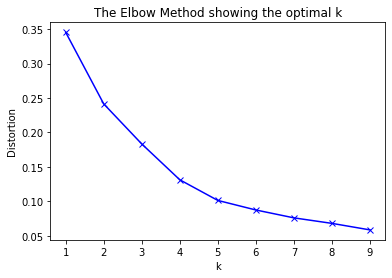

In [73]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data1 = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data1
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 6.4 
**Prepare a separate Data frame to show which stocks belong to the same cluster**

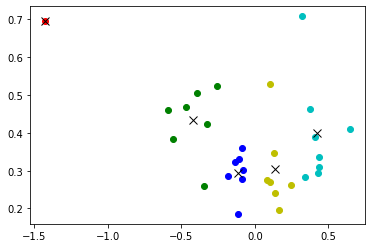

In [86]:
centroids,_ = kmeans(X,5)
idx,_ = vq(data1,centroids)
plot(data1[idx==0,0],data1[idx==0,1],'ob',
     data1[idx==1,0],data1[idx==1,1],'oy',
     data1[idx==2,0],data1[idx==2,1],'or',
     data1[idx==3,0],data1[idx==3,1],'og',
     data1[idx==4,0],data1[idx==4,1],'oc')
plot(centroids[:,0],centroids[:,1],'xk',markersize=8)

In [87]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('Adani Ports', 1)
('BPCL', 3)
('Cipla', 1)
('DrReddy', 0)
('GAIL', 4)
('Hindalco', 4)
('INFY', 1)
('IOC', 0)
('LT', 3)
('TCS', 1)
('Adani Power', 4)
('Castrol', 0)
('Cummins', 3)
('Godrej', 1)
('GMR Infra', 1)
('IDBI', 3)
('MRPL', 0)
('NBCC', 4)
('PNB', 4)
('SUN TV', 1)
('Bajaj Electric', 4)
('Centuryply', 4)
('Fortis', 3)
('IDFC', 0)
('IRCON', 0)
('ITDC', 3)
('NCC', 4)
('PVR', 0)
('Reliance Comm', 2)
('Suzlon', 3)
